# Session 7
##### 21-April-2022

## Example of a Convolutional Neural network (Deep learning) 
Majority of the code has been borrowed from an assignment in *HSE: Introduction to Deep Learning (Coursera)*

### Below we import the neccesarry libraries

In [1]:
# ML libraries
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
import keras_utils

print(tf.__version__)
print(keras.__version__)

#Numerical Python (Numpy) for math
import numpy as np

#MAtplotlib for plotting
%matplotlib inline
import matplotlib.pyplot as plt

2.8.0
2.8.0


 ### Reading the dataset
 - Downloading the required data (If we have our own data, we would load that instead)
 - Here we're using the CIFAR-10 dataset. It consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [2]:
#Downloading the dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
#Visualize dataframe dimentions
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [5]:
# Define the labels - (It is defined in the dataset)
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

### Visualize the input data

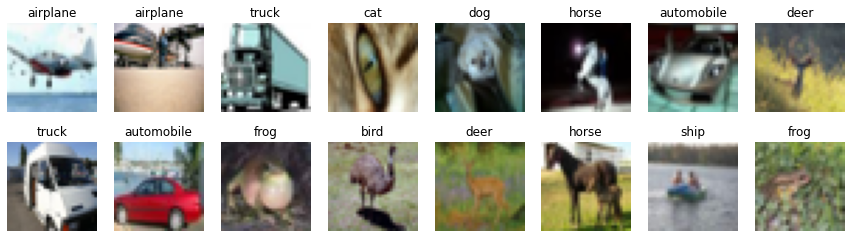

In [7]:
# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

### Perform some pre-processing

In [8]:
np.max(x_train[0]) #We see that the data is in the range 0-255

255

We need to normalize inputs like this: $$ x_{norm} = \frac{x}{255} - 0.5 $$

We need to convert class labels to one-hot encoded vectors. Use __keras.utils.to_categorical__.

In [9]:
# normalize inputs
x_train2 = (x_train/255)-0.5
x_test2 = (x_test/255)-0.5

# convert class labels to one-hot encoded
y_train2 = tf.keras.utils.to_categorical(y_train,NUM_CLASSES)
y_test2 = tf.keras.utils.to_categorical(y_test,NUM_CLASSES)

In [10]:
print(np.std(x_train2))
print(np.mean(x_train2))

0.25156892506322037
-0.026636999514910154


### Defining the model

In [14]:
# import necessary building blocks
from keras.models import Sequential #The model type
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout 
from keras.layers.advanced_activations import LeakyReLU

##### Convolutional networks are built from several types of layers:
- [Conv2D](https://keras.io/layers/convolutional/#conv2d) - performs convolution:
    - **filters**: number of output channels; 
    - **kernel_size**: an integer or tuple/list of 2 integers, specifying the width and height of the 2D convolution window;
    - **padding**: padding="same" adds zero padding to the input, so that the output has the same width and height, padding='valid' performs convolution only in locations where kernel and the input fully overlap;
    - **activation**: "relu", "tanh", etc.
    - **input_shape**: shape of input.
- [MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d) - performs 2D max pooling.
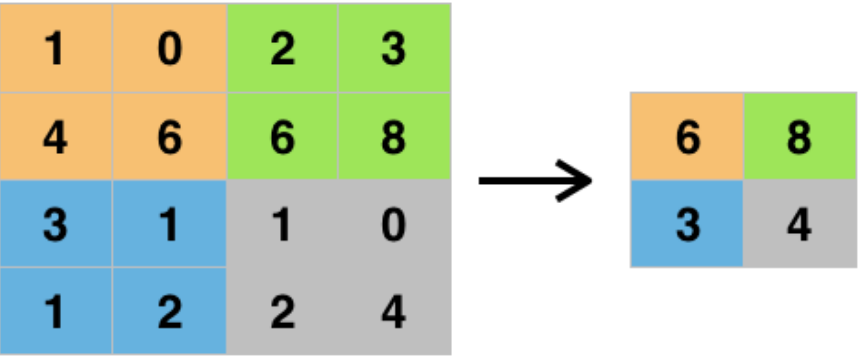 Refer: https://deepai.org/machine-learning-glossary-and-terms/max-pooling

- [Flatten](https://keras.io/layers/core/#flatten) - flattens the input, does not affect the batch size.
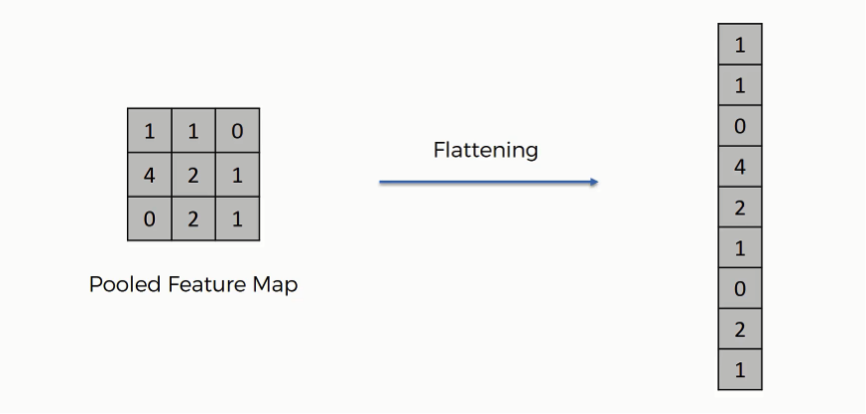
- [Dense](https://keras.io/layers/core/#dense) - fully-connected layer.
- [Activation](https://keras.io/layers/core/#activation) - applies an activation function.
- [LeakyReLU](https://keras.io/layers/advanced-activations/#leakyrelu) - applies leaky relu activation.
- [Dropout](https://keras.io/layers/core/#dropout) - applies dropout.

How CNN (Convolutional Neural Network) generally looks like
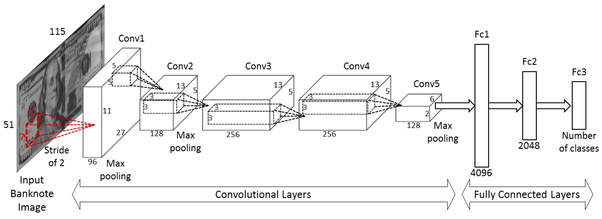
Img Source:https://www.quora.com/What-is-the-meaning-of-flattening-step-in-a-convolutional-neural-network

### Define the model

In [15]:
#Function to make the model by adding one layer at a time onto the sequential stack

def make_model():
    """
    Returns `Sequential` model.
    """
    model = Sequential()
    model.add(Conv2D(16,kernel_size=(3,3),input_shape=(32,32,3),padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32,kernel_size=(3,3),padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"))
    model.add(Dropout(0.25))
    model.add(Conv2D(32,kernel_size=(3,3),padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64,kernel_size=(3,3),padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(NUM_CLASSES))
    model.add(Activation("softmax"))
    
    return model

In [16]:
# describe the model
s = tf.keras.backend.clear_session()  # clear default graph
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

### Compile the model

 - We can see above that the model above has a little more than a million trainable parameters.
 - Now we compile the model before training. This is where we define the loss, optimizer and the metrics to be reported.

In [17]:
## Compiling the model

INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 32
EPOCHS = 10

s = tf.keras.backend.clear_session()  # clear default graph
# don't call K.set_learning_phase() !!! (otherwise will enable dropout in train/test simultaneously)
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=tf.keras.optimizers.Adamax(learning_rate=INIT_LR),  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

### Training (Skip this if you have a trained model)

Training takes approximately **1.5 hours**.

In [18]:
# we will save model checkpoints to continue training in case of kernel death
model_filename = 'Saved_Models/cifar_demo.{epoch:03d}.hdf5' #Make sure the folder exists before running this
last_finished_epoch = None #Change this to last finished epoch if continuing from middle

#### uncomment below to continue training from model checkpoint
#### fill `last_finished_epoch` with your latest finished epoch

# from keras.models import load_model
# s = tf.keras.backend.clear_session()
# last_finished_epoch = 6
# model = load_model(model_filename.format(epoch = last_finished_epoch))
    
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filename,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [19]:
# fit model
model.fit(
    x_train2, y_train2,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[model_checkpoint_callback],
    validation_data=(x_test2, y_test2),
    shuffle=True,
    verbose=1,
    initial_epoch=(last_finished_epoch or 0)
)

Epoch 1/10
 195/1563 [==>...........................] - ETA: 2:47 - loss: 1.8790 - accuracy: 0.3074

KeyboardInterrupt: 

### Evaluate model

In [20]:
# load weights from file (In case model is already saved - from checkpoint)

from keras.models import load_model
s = tf.keras.backend.clear_session()
last_finished_epoch = 3
model = load_model(model_filename.format(epoch = last_finished_epoch))

In [22]:
# make test predictions
y_pred_test = model.predict(x_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

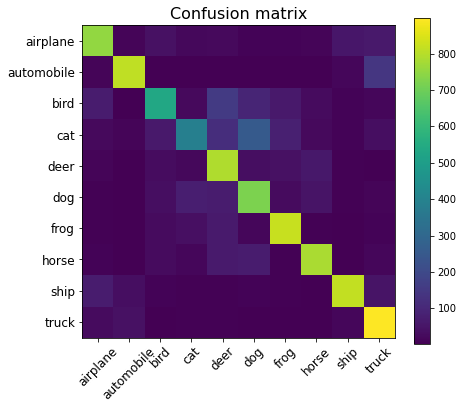

Test accuracy: 0.7312


In [23]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score

plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()

print("Test accuracy:", accuracy_score(y_test, y_pred_test_classes))

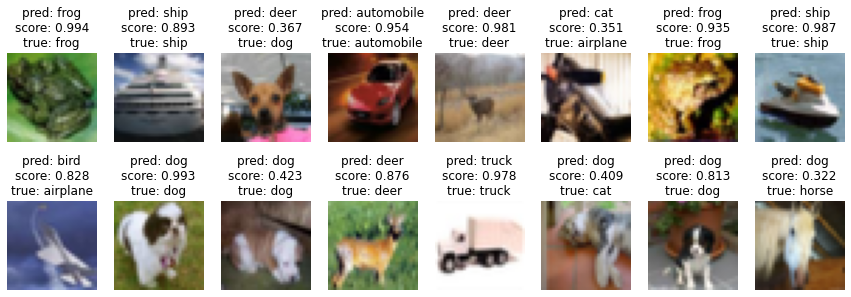

In [25]:
# inspect preditions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

What we've done:
- defined CNN architecture
- trained your model
- evaluated your model
- visualised learnt filters (Will try next session)